Labels:
 [1. 1. 2. 0. 2. 1. 2. 0. 2. 0.]
Feature Data:
 [[ 2.20005302e+00 -1.59961509e+00 -3.19022570e+00  2.70521515e+00
   5.49348146e+00  4.36099919e+00 -4.02762664e+00 -2.28464344e-01
   6.49774592e-01  6.01760420e+00 -1.07875612e+00 -1.04636341e+00
  -7.65352977e+00 -6.58885511e+00  5.35962366e+00  6.75833208e+00
  -1.35935284e+00  4.51288957e+00  2.64880015e+00 -2.67886520e+00
   1.56804593e+00  7.32335842e+00 -5.70888345e-01  6.90080809e+00
  -1.14833498e+01  3.78719205e+00  1.65239386e+00  2.62792996e-02
   1.45711478e+00 -1.03694649e+01 -6.94629349e-01  1.76136725e+00
   6.48576836e+00 -2.26699181e+00 -5.22150781e+00 -1.32110583e+00
   4.11239329e+00  1.84491520e+00 -2.36551315e+00  2.30743219e+00
   1.07208155e+00  4.36832130e+00 -2.63896817e+00 -2.98429041e+00
  -1.83416119e+00 -5.37864574e+00  4.80270061e-01  6.27531390e-01
   5.39475133e-01 -9.93353885e-01]
 [ 9.45241572e-01 -2.06993007e+00 -4.17702992e+00  2.75041991e+00
   3.26138295e+00  4.86969430e+00 -4.19488214e+00 -

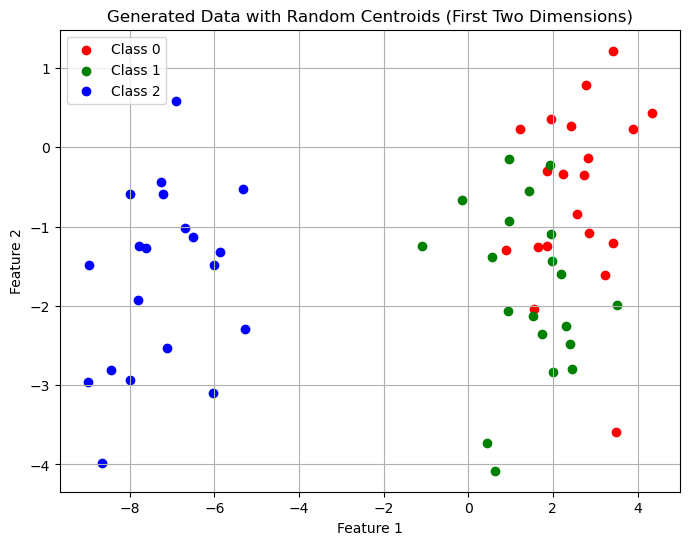

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
n_classes = 3
n_observations_per_class = 20
n_variables = 50
n_total_observations = n_classes * n_observations_per_class

# Initialize the data array and labels
X = np.zeros((n_total_observations, n_variables))
y = np.zeros(n_total_observations)

# Set random centroids for each class
np.random.seed(42)  # For reproducibility
centroids = np.random.randn(n_classes, n_variables) * 5  # Random centroids with variance

# Generate data for each class, with data points centered around random centroids
for i in range(n_classes):
    # Generate random data around the centroid with some noise
    X[i * n_observations_per_class:(i + 1) * n_observations_per_class, :] = np.random.randn(n_observations_per_class, n_variables) + centroids[i]
    y[i * n_observations_per_class:(i + 1) * n_observations_per_class] = i

# Shuffle the dataset (optional, but helps for modeling)
shuffled_indices = np.random.permutation(n_total_observations)
X = X[shuffled_indices]
y = y[shuffled_indices]

# Print the first few labels and feature data to check
print("Labels:\n", y[:10])
print("Feature Data:\n", X[:10])

# Optional: Visualize the clusters in 2D using the first two dimensions of the data
plt.figure(figsize=(8, 6))
for class_label, color in zip(range(n_classes), ['r', 'g', 'b']):
    plt.scatter(X[y == class_label, 0], X[y == class_label, 1], label=f'Class {class_label}', c=color)

plt.title("Generated Data with Random Centroids (First Two Dimensions)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

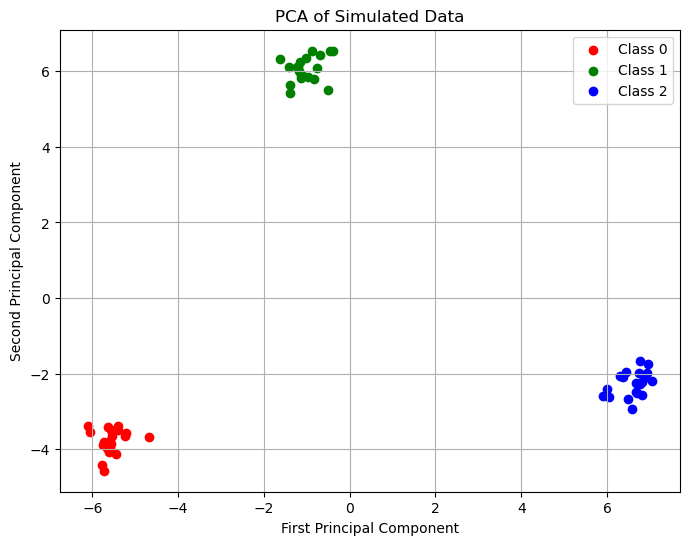

In [39]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data (PCA is affected by scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # We only need the first two principal components
X_pca = pca.fit_transform(X_scaled)

# Plot the first two principal components
plt.figure(figsize=(8, 6))

# Scatter plot of the PCA-transformed data
for class_label, color in zip([0, 1, 2], ['r', 'g', 'b']):
    plt.scatter(X_pca[y == class_label, 0], 
                X_pca[y == class_label, 1], 
                label=f'Class {class_label}', 
                c=color)

# Add labels and legend
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Simulated Data')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\PINYKEWD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Crosstab of True Labels vs. K-means Clusters:
K-means Cluster   0   1   2
True Class                 
0.0               0  20   0
1.0              20   0   0
2.0               0   0  20


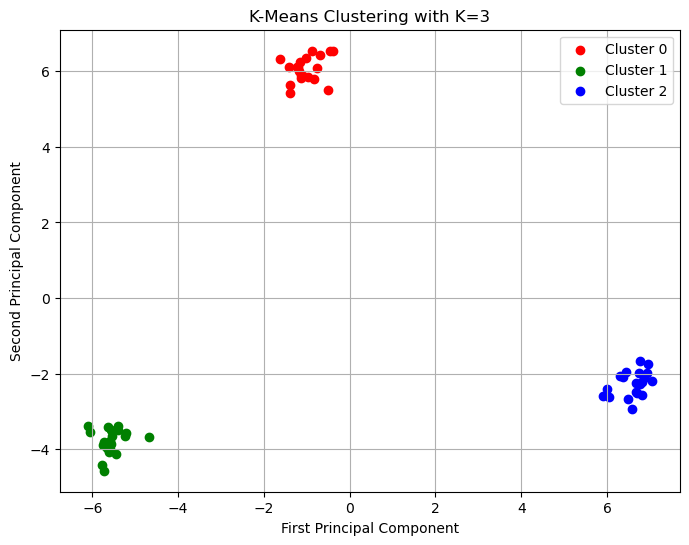

In [41]:
import pandas as pd 
from sklearn.cluster import KMeans

# Perform K-means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.labels_

# Compare K-means clustering results to the true labels using pd.crosstab()
comparison = pd.crosstab(y, y_kmeans, rownames=['True Class'], colnames=['K-means Cluster'])

# Print the crosstab result
print("Crosstab of True Labels vs. K-means Clusters:")
print(comparison)

# Plot the clustering result (optional - use PCA for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))

# Scatter plot of the PCA-transformed data with K-means labels
for class_label, color in zip([0, 1, 2], ['r', 'g', 'b']):
    plt.scatter(X_pca[y_kmeans == class_label, 0], 
                X_pca[y_kmeans == class_label, 1], 
                label=f'Cluster {class_label}', 
                c=color)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering with K=3')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\PINYKEWD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Crosstab of True Labels vs. K-means Clusters with K=2:
K-means Cluster   0   1
True Class             
0.0               0  20
1.0              20   0
2.0              20   0


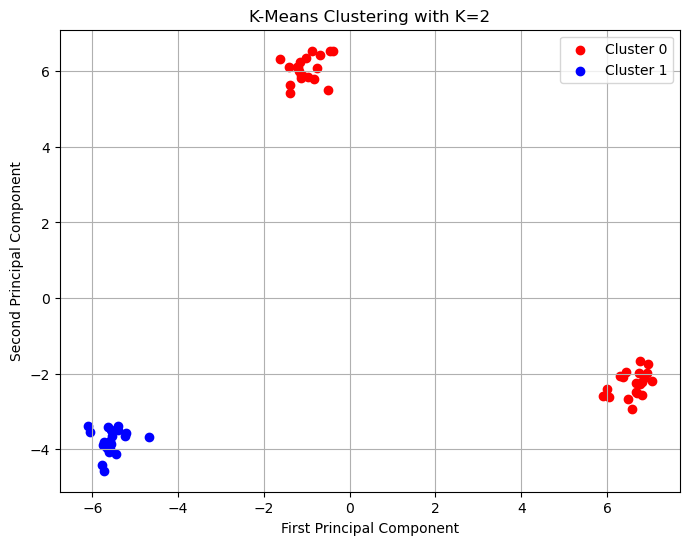

In [43]:
# Perform K-means clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.labels_

# Compare K-means clustering results to the true labels using pd.crosstab()
comparison = pd.crosstab(y, y_kmeans, rownames=['True Class'], colnames=['K-means Cluster'])

# Print the crosstab result
print("Crosstab of True Labels vs. K-means Clusters with K=2:")
print(comparison)

# Plot the clustering result (optional - use PCA for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))

# Scatter plot of the PCA-transformed data with K-means labels (for K=2)
for class_label, color in zip([0, 1], ['r', 'b']):
    plt.scatter(X_pca[y_kmeans == class_label, 0], 
                X_pca[y_kmeans == class_label, 1], 
                label=f'Cluster {class_label}', 
                c=color)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering with K=2')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\PINYKEWD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Crosstab of True Labels vs. K-means Clusters with K=4:
K-means Cluster   0  1   2   3
True Class                    
0.0               0  8   0  12
1.0              20  0   0   0
2.0               0  0  20   0


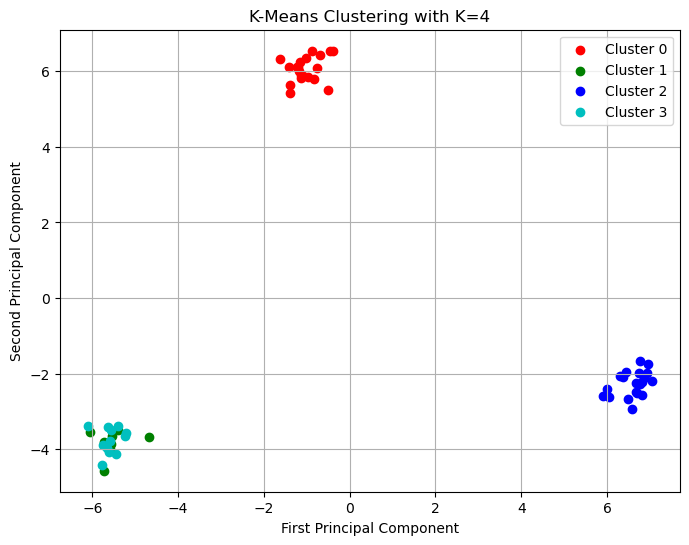

In [45]:
# Perform K-means clustering with K=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.labels_

# Compare K-means clustering results to the true labels using pd.crosstab()
comparison = pd.crosstab(y, y_kmeans, rownames=['True Class'], colnames=['K-means Cluster'])

# Print the crosstab result
print("Crosstab of True Labels vs. K-means Clusters with K=4:")
print(comparison)

# Plot the clustering result (optional - use PCA for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))

# Scatter plot of the PCA-transformed data with K-means labels (for K=4)
for class_label, color in zip([0, 1, 2, 3], ['r', 'g', 'b', 'c']):
    plt.scatter(X_pca[y_kmeans == class_label, 0], 
                X_pca[y_kmeans == class_label, 1], 
                label=f'Cluster {class_label}', 
                c=color)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering with K=4')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\PINYKEWD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Crosstab of True Labels vs. K-means Clusters on Scaled Data (K=3):
K-means Cluster   0   1   2
True Class                 
0.0               0  20   0
1.0              20   0   0
2.0               0   0  20


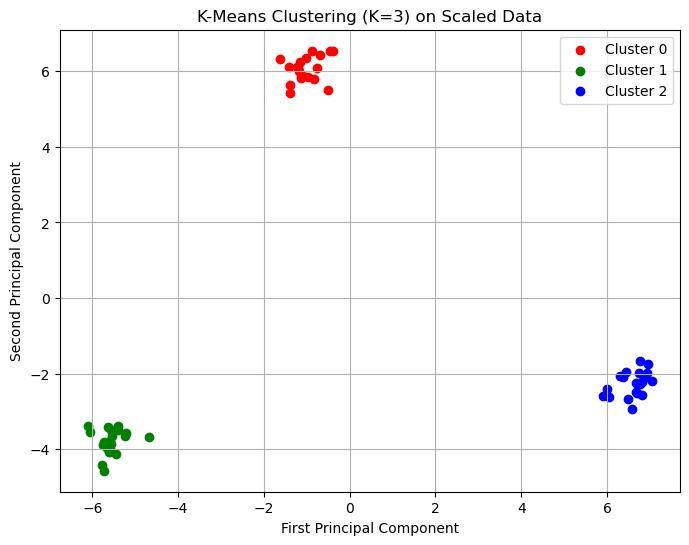

In [47]:
# Perform K-means clustering with K=3 on scaled data
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
kmeans_scaled.fit(X_scaled)
y_kmeans_scaled = kmeans_scaled.labels_

# Compare K-means clustering results to the true labels using pd.crosstab()
comparison_scaled = pd.crosstab(y, y_kmeans_scaled, rownames=['True Class'], colnames=['K-means Cluster'])

# Print the crosstab result
print("Crosstab of True Labels vs. K-means Clusters on Scaled Data (K=3):")
print(comparison_scaled)

# Optional: Use PCA to visualize the clustering on scaled data
pca = PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))

# Scatter plot of the PCA-transformed data with K-means labels on scaled data
for class_label, color in zip([0, 1, 2], ['r', 'g', 'b']):
    plt.scatter(X_pca_scaled[y_kmeans_scaled == class_label, 0], 
                X_pca_scaled[y_kmeans_scaled == class_label, 1], 
                label=f'Cluster {class_label}', 
                c=color)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering (K=3) on Scaled Data')
plt.legend()
plt.grid(True)
plt.show()